# Lab 6A: K-Nearest Neighbor

In this lab we will be using the library scikit-learn to train a K-Nearest Neighbor classifier and graph the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 1: Load and visualize dataset

- Below, load in the datasets (`file_train.csv`, `file_test.csv`). the training set has 800 samples and the test set has 200 samples.
- Create a figure with two subplots showing the train and test data side-by-side.
    - Be sure to label your subplots with informative titles (which datset are we looking at?).
    - Color-code the points based on their class.
    - Set the figure size to make everything clearly legible (not microscopic).

#### Format of data
- Column 1: x coordinate of a 2D point.
- Column 2: y coordinate of a 2D point.
- Column 3: class. Which spiral arm does the point belong to? Labels: [0, 1]

Text(0.5, 1.0, 'Testing Data')

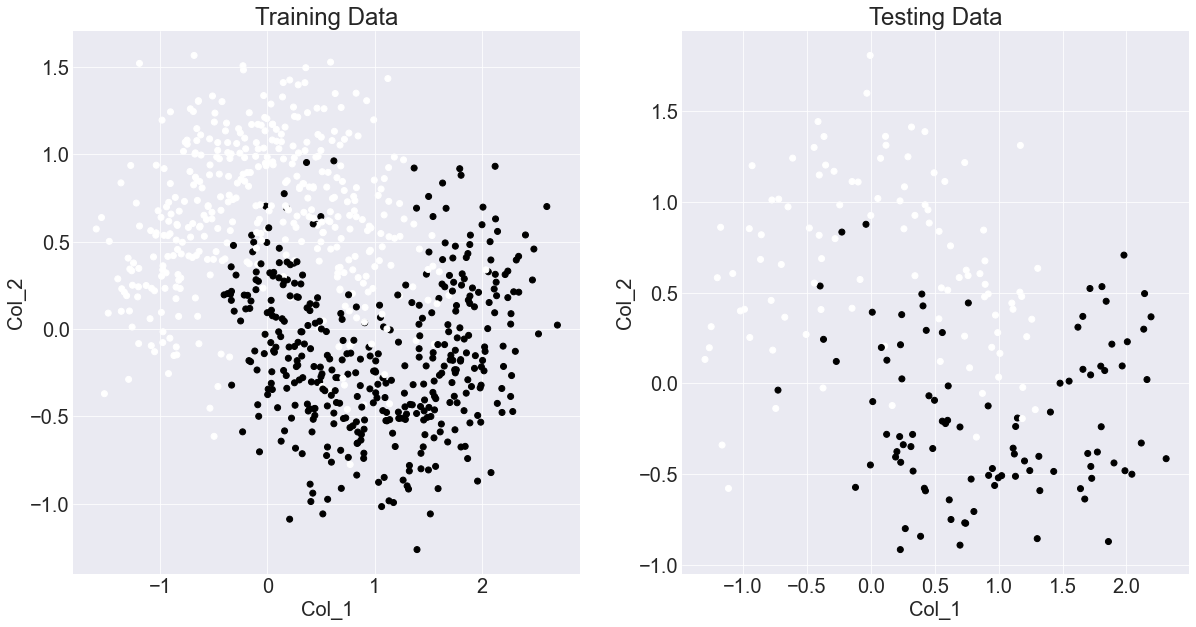

In [2]:
#load data sets train and test
train_df = pd.read_csv('data/file_train.csv',header = None)

test_df = pd.read_csv('data/file_test.csv', header = None)


#create two subplots showing train and test data side by side
fig, ax = plt.subplots(1,2, figsize = (20,10))

#plot train data
ax[0].scatter(train_df.iloc[:,0],train_df.iloc[:,1], c = train_df.iloc[:,2])
ax[0].set_xlabel('Col_1')
ax[0].set_ylabel('Col_2')
ax[0].set_title('Training Data')


#plot test data
ax[1].scatter(test_df.iloc[:,0], test_df.iloc[:,1], c = test_df.iloc[:,2])
ax[1].set_xlabel('Col_1')
ax[1].set_ylabel('Col_2')
ax[1].set_title('Testing Data')



## Task 2: Predict dataset and graph results

1. Create a [K-Nearest Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) [(More Info)](https://scikit-learn.org/stable/modules/neighbors.html#classification).  Set `n_neighbors` equal to 10.
2. Use the fit method with the coordinate columns of the training dataset as X and the class column as the target.
3. Calculate the accuracy of the classifier with the test data using the score method.
4. Print the accuracy of the classifier.
    

In [3]:
from sklearn.neighbors import KNeighborsClassifier
#Create a KNN classifier with n_neighbors = 0
knn_classifier = KNeighborsClassifier(n_neighbors = 10)

#use fit method with coordinate columns of training dataset as X and the class column as target
knn_classifier.fit(train_df.iloc[:, 0:2], train_df.iloc[:,2])

#Calculate accuracy of classifier with test data using score method
accuracy_score = knn_classifier.score(test_df.iloc[:, 0:2], test_df.iloc[:,2])

print(f"Accuracy:", accuracy_score)
print("Your accuracy should be 0.92")

Accuracy: 0.92
Your accuracy should be 0.92


## Task 3: Visualize class boundaries

Visualize how different regions of the (2D) dataspace would be classified based on the results of the trained KNN Classifier from Task 2.

1. Create a meshgrid for predicting values
    1. Create a [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) for your x-axis and your y-axis
        2. Set the start argument to the min value of your column -.5
        3. Set the end argument to the max value of your column +.5
        4. Set the number of samples to 300
    2. Assign `x_samples` and `y_samples` to a [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) with the linspace as the arguments for x1 and x2.
    3. [Flatten](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.flatten.html)`x_samples` and `y_samples` and save into new variables.
    3. Create a list of x and y sample coordinate pairs, by [column stacking](https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html) the flattened x_samples and y_samples
2. Use your coordinate pairs as predict inputs for the knn classifier you created in Task 2. 
3. Reshape the results to the same shape as `x_samples`.
1. In 1 plot, graph your results
    1. Create two [ListedColormap](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.colors.ListedColormap.html) [(example)](https://matplotlib.org/3.2.1/tutorials/colors/colormap-manipulation.html)
        1. One should have dark values of 2 colors
        1. One should have light values of the same 2 colors
    1. Use [pcolormesh](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html) to plot your predicted values grid.
        1. Plot x_samples, y_samples and your reshaped predicted results and the light value colormap.
    2. Plot the training points with using a scatter plot with the dark value colormap.
    3. Title your plot and label the axis.

In [4]:
#1. Create a meshgrid for predicting values
#convert train and test to numpy arrays
train = np.array(train_df)

test = np.array(test_df)

#create linspace for x-axis and y-axis for train
x_train = np.linspace(np.min(train[:,0]) - 0.5, np.max(train[:,0]) + 0.5, 300)

y_train = np.linspace(np.min(train[:,1]) - 0.5, np.max(train[:,1]) + 0.5, 300)


#create meshgrid for train data
x_samples, y_samples = np.meshgrid(x_train, y_train)


#flatten x_samples, y_samples
x_flattened = x_samples.flatten()

y_flattened = y_samples.flatten()

#create a list of x and y sample coordinate pairs by column stacking
train_mesh = np.column_stack((x_flattened,y_flattened))

print(train_mesh.shape)

print(train_mesh[0:5])

#use coordinate pairs to predict input for knn classifier
predictions = knn_classifier.predict(train_mesh)

#reshape predictions to 300 by 300
predictions_reshaped = np.reshape(predictions, (300,300))

print(predictions_reshaped.shape)


(90000, 2)
[[-2.0978  -1.76279]
 [-2.08005 -1.76279]
 [-2.06231 -1.76279]
 [-2.04457 -1.76279]
 [-2.02683 -1.76279]]
(300, 300)


Text(0, 0.5, 'y_samples')

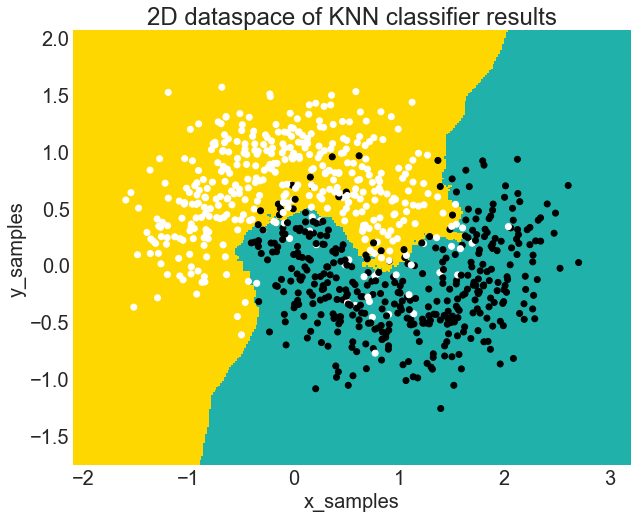

In [10]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#Plot results

#Create 2 ListedColormaps: one with a dark shade and the other with a lighter shade of the same color

cmap_2 = ListedColormap(["darkorange", "lawngreen"])
cmap_1 = ListedColormap(["gold", "lightseagreen"])

plt.figure(figsize= (10,8))
plt.pcolormesh(x_samples, y_samples, predictions_reshaped, cmap=cmap_1)

#plot training points
plt.scatter(train[:,0], train[:,1], c=train[:,2] )
plt.title("2D dataspace of KNN classifier results")
plt.xlabel("x_samples")
plt.ylabel("y_samples")